# **NATURAL LANGUAGE PROCESSING**

**Natural Language Processing and Machine Learning make it possible to build robust models with the storage capacity and processing power available to us today. Natural Language Processing concepts deal with processing human langauge while discovering patterns, relationships and, semantics present in large amounts of data.**

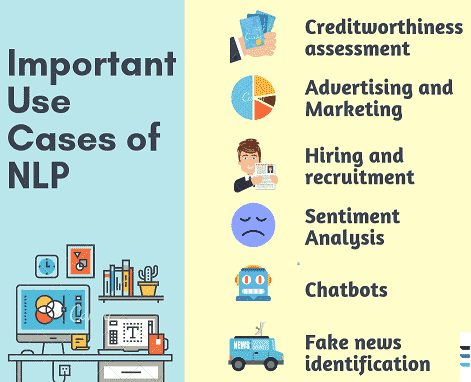

# **Description**

**This is a starter notebook for NLP in text processing. It covers Data Preprocessing and Feature Engineering in comprehensive details. The code is implemented in popular NLP libraries namely NLTK, SpaCy, and occasionaly TextBlob. Please upvote and share the notebook if you found it helpful in any way. Thank you in advance!.**

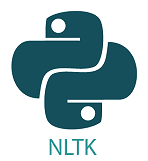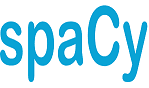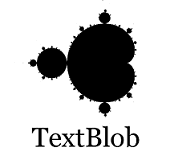

# **Content**

* **ENVIRONMENT SETUP**
    * Install Packages
    * Import Packages
    

* **DATA PREPROCESSING**
    * Data Loading
    * Preliminary Analysis
    * Sentence Tokenization
    * Word Tokenization
    * Stopword Removal
    * Removal of Tags
    * Delimiter Removal
    * Spell Check 
    * Stemming
    * Lemmatization
    
    
* **FEATURE ENGINEERING**
    * Encoding    
    * POS Tagger
    * N-GRAM
    * Bag Of Words
    * TF
    * TF-IDF
    * Dependency Parser
    * Named Entity Recognition
    * Word Embedding
    * Sentiment Analysis
    * Subjectivity Detection

# **ENVIRONMENT SETUP**

# **Install Packages**

In [1]:
!pip install -q autocorrect

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


<div class = "alert alert-success" style='color:black'> 🌟 SpaCy Version 3.0! </div>

In [2]:
!pip install -q spacy==3.0.5

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 2.3.1 requires spacy<2.4.0,>=2.3.0, but you have spacy 3.0.5 which is incompatible.
en-core-web-lg 2.3.1 requires spacy<2.4.0,>=2.3.0, but you have spacy 3.0.5 which is incompatible.
allennlp 1.2.2 requires spacy<2.4,>=2.1.0, but you have spacy 3.0.5 which is incompatible.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [5]:
!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_lg

2022-08-06 01:03:11.001825: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.2
     |████████████████████████████████| 13.7 MB 1.6 MB/s eta 0:00:01
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.3.1
    Uninstalling en-core-web-sm-2.3.1:
      Successfully uninstalled en-core-web-sm-2.3.1
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
!pip install -q spacytextblob

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


# **Import Packages**

In [7]:
import warnings
import numpy as np 
import pandas as pd 
import os
import re
import nltk
from nltk.corpus import abc
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.stem.snowball import *
from nltk.util import ngrams
import string
import spacy
from spacy import displacy
from spacytextblob.spacytextblob import SpacyTextBlob
from autocorrect import Speller
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from wordcloud import WordCloud, STOPWORDS
import gensim
from gensim.models.word2vec import Text8Corpus
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from IPython.core.display import HTML
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# **DATA PREPROCESSING**

# **Data Loading**

In [8]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/glove6b/glove.6B.200d.txt
/kaggle/input/glove6b/glove.6B.50d.txt
/kaggle/input/glove6b/glove.6B.300d.txt
/kaggle/input/glove6b/glove.6B.100d.txt
/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [9]:
data = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
print('Total number of entries in the train dataset are:', len(data))
data.head()

Total number of entries in the train dataset are: 7613


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# **Preliminary Analysis**

In [10]:
data.shape

(7613, 5)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [12]:
data.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [13]:
data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [14]:
data.isna()

,id,keyword,location,text,target
0,False,True,True,False,False
1,False,True,True,False,False
2,False,True,True,False,False
3,False,True,True,False,False
4,False,True,True,False,False
...,...,...,...,...,...
7608,False,True,True,False,False
7609,False,True,True,False,False
7610,False,True,True,False,False
7611,False,True,True,False,False


In [15]:
data = data[['id', 'text']]
data

,id,text
0,1,Our Deeds are the Reason of this #earthquake M...
1,4,Forest fire near La Ronge Sask. Canada
2,5,All residents asked to 'shelter in place' are ...
3,6,"13,000 people receive #wildfires evacuation or..."
4,7,Just got sent this photo from Ruby #Alaska as ...
...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...
7609,10870,@aria_ahrary @TheTawniest The out of control w...
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,10872,Police investigating after an e-bike collided ...


In [16]:
text = data['text']
text

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

# **Sentence Tokenization**

For any corpus, we first divide a huge entity into smaller entities so that they can be treated individually. Tokenization also does a similar task but upon sentences in text. First, the text is broken down into sentences and that is further broken down into words. The input is given as text or a corpus. The output generates a list of sentences. For example, in the text, "I love dogs. I have a dog", the output is ["I love dogs,” I have a dog”]

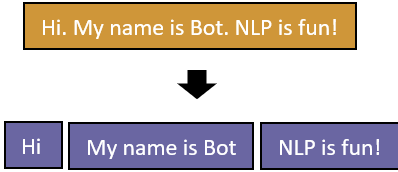

In [17]:
# sents1 = sent_tokenize() # tokenize the 1000th text
# print(f'Sentence Tokenization using NLTK: \n {text[1000]} => {sents1}')

Sentence Tokenization using NLTK: 
 #OVOFest Drake straight body bagging Meek on that OVO stage. #ZIPHIMUP! => ['#OVOFest Drake straight body bagging Meek on that OVO stage.', '#ZIPHIMUP!']


# **Word Tokenization**

Word tokenization is the same as sentence tokenization. But, rather than applying it to
sentences, it is used on words so that individual words are separated as items in a
list. For example, in the sentence, "Chennai is humid,” the result is ["Chennai,” “is,”
“humid”].

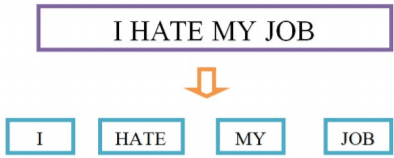

In [26]:
# words1 = word_tokenize() # tokenize the first sentence
# print(f'Word Tokenization using NLTK: \n {sents1[0]} => {words1}')

Word Tokenization using NLTK: 
 #OVOFest Drake straight body bagging Meek on that OVO stage. => ['#', 'OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'on', 'that', 'OVO', 'stage', '.']


In [20]:
sp = spacy.load('en_core_web_sm')

/opt/conda/lib/python3.7/site-packages/spacy/util.py:1514: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [21]:
print(f'Word Tokenization using SpaCy: \n\n{sp(text[0])} =>\n')

words2 = sp(text[0])
for word in words2:
    print(word)

Word Tokenization using SpaCy: 

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all =>

Our
Deeds
are
the
Reason
of
this
#
earthquake
May
ALLAH
Forgive
us
all


# **Stopword Removal**

The dataset may contain words like ‘after,’ ‘every’ and ‘I.’ These words are not relevant to important NLP applications like the sentiment detection process. Thereby, these words can be deleted to minimize the burden on the system.

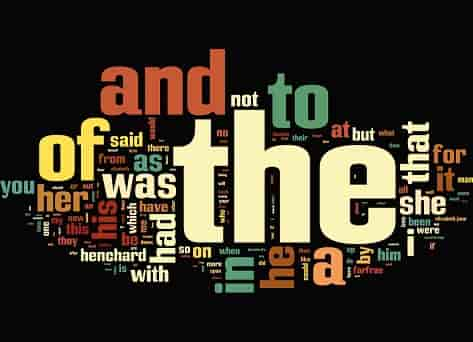

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [40]:
words1 = ['#',
 'OVOFest',
 'Drake',
 'straight',
 'body',
 'bagging',
 'Meek',
 'on',
 'that',
 'OVO',
 'stage',
 '.']

In [29]:
tokens1 = [word for word in words1 if word not in stopwords.words('english')] 
print(f'Stopword Removal using NLTK: \n{words1} => {tokens1}')

Stopword Removal using NLTK: 
['#', 'OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'on', 'that', 'OVO', 'stage', '.'] => ['#', 'OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'OVO', 'stage', '.']


In [30]:
spacy_stopwords = sp.Defaults.stop_words
print(f'SpaCy Stopwords: \n{spacy_stopwords}')

SpaCy Stopwords: 
{'please', 'yours', 'last', 'another', '‘s', 'any', 'twenty', 'their', 'onto', 'thereafter', 'beyond', 'already', 'within', 'fifty', 'could', 'empty', 'toward', 'much', 'ca', 'otherwise', "'s", 'move', 'no', 'neither', 'forty', 'everywhere', 'ten', 'formerly', 'just', 'been', 'eight', 'third', 'twelve', 'except', 'nor', 'either', 'unless', 'among', 'off', 'without', 'four', 'thru', 'via', 'many', 'take', 'may', 'perhaps', 'every', 'we', 'sometime', 'herself', 'three', 'done', 'with', 'one', 'less', 'himself', 'someone', 'seems', '‘ll', 'anything', 'were', 'around', 'against', 'nevertheless', 'yourself', 'does', 'elsewhere', 'never', 'everyone', 'more', 'so', 'hereupon', 'your', '’s', 'ours', 'anyhow', 'on', 'alone', 'will', '’ll', 'amount', 'go', 'name', 'keep', 'our', 'two', 'across', 'until', 'can', 'give', 'to', 'enough', 'there', 'hers', 'yet', 'herein', 'always', 'doing', 'how', 'seeming', 'me', 'first', 'at', 'than', 'others', 'thus', 'too', 'us', 'out', 'else',

In [31]:
tokens2 = [word for word in words2 if word not in spacy_stopwords] 
print(f'Stopword Removal using SpaCy: \n{words2} => {tokens2}')

Stopword Removal using SpaCy: 
Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all => [Our, Deeds, are, the, Reason, of, this, #, earthquake, May, ALLAH, Forgive, us, all]


# **Delimiter Removal**

Delimiters are removed to reduce the size of the dataset as they do not supply any vital information in some cases. A Few delimiters are question marks (?), full stops (.), and exclamation marks (!). For example, after delimiter removal the sentence 'I am cold!' becomes 'I am cold'. 

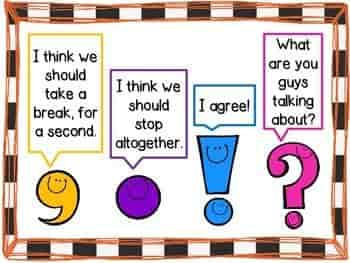

In [32]:
from string import punctuation
print(f'Delimiters in English: \n{punctuation}')

Delimiters in English: 
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [33]:
tokens1 = [word for word in words1 if word not in punctuation]
print(f'Delimiter Removal: \n{words1} => {tokens1}')

Delimiter Removal: 
['#', 'OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'on', 'that', 'OVO', 'stage', '.'] => ['OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'on', 'that', 'OVO', 'stage']


# **Removal of Tags**

During web scraping, the data is scraped from web pages residing on the website, and they contain HTML tags. These tags do not provide any necessary information and hence, can be erased. For example, a tag like < body > (Body Tag) is deleted.

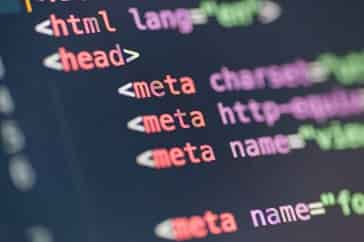

In [34]:
sent_with_html = "<head> <title> Natural Language Processing </title> </head>"
remove_html = re.compile('<.*?>')

print(f"Removing HTML tags: \n{sent_with_html} => {re.sub(remove_html, '', sent_with_html).strip()}")

Removing HTML tags: 
<head> <title> Natural Language Processing </title> </head> => Natural Language Processing


# **Spell Check**

While communicating online, people use shorthand, urban dictionary words, and slang in their language. Standard dictionaries do not hold these words, so lookups into these dictionaries lead to inconsistency in data. Therefore it is essential to correct spelling.

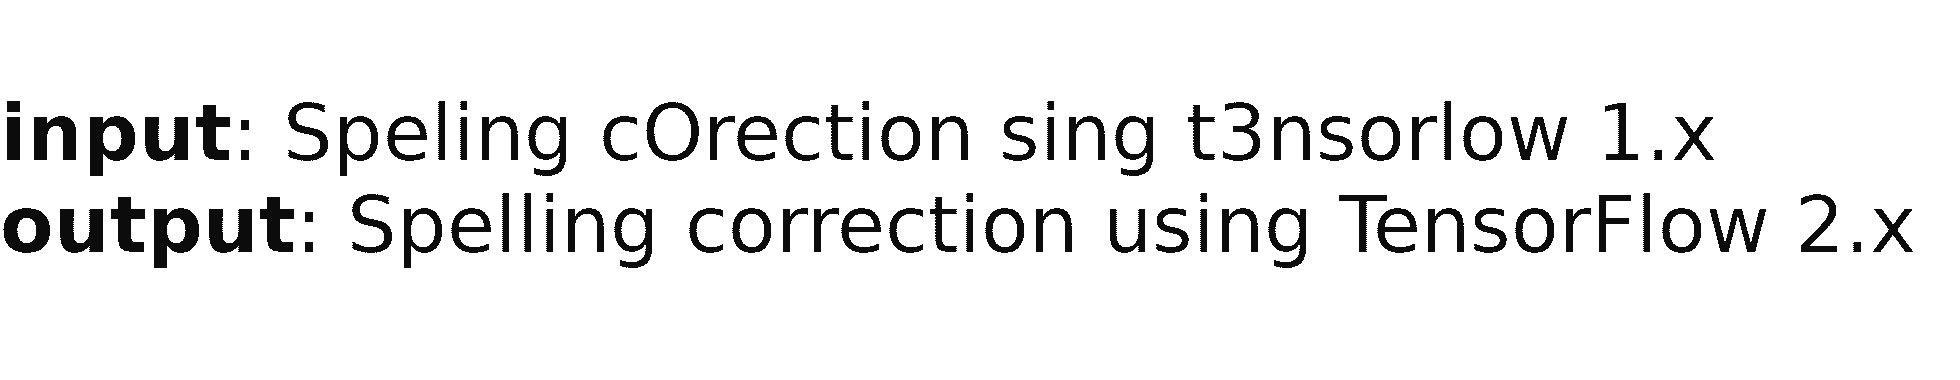

In [35]:
spell = Speller()

print('Spelling Correction:\n')
for token in tokens1:
    print(f'{token} => {spell(token)}')


Spelling Correction:

OVOFest => OVOFest
Drake => Drake
straight => straight
body => body
bagging => bagging
Meek => Meek
on => on
that => that
OVO => VO
stage => stage


In [36]:
spell = Speller()
misspelled = ['Calandar', 'neccessary', 'recieve', 'adress', 'misteak']

print('Tokens before and after Spelling Correction (Own Example):\n')
for token in misspelled:
    print(f'{token} : {spell(token)}')


Tokens before and after Spelling Correction (Own Example):

Calandar : Calendar
neccessary : necessary
recieve : receive
adress : address
misteak : mistake


# **Stemming**

Stemming applies algorithmic rules to extract the stem out of the derived word simply. The words produced by this step do not have any essential meaning, but they are simply a bunch of letters put together without affixes. For example, the word “beautiful” is stemmed to “Beauti”.

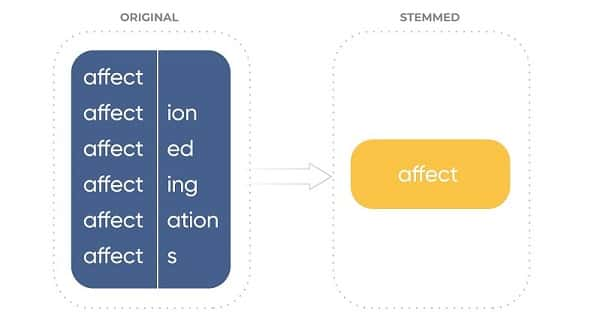

In [41]:
porterStemmer = PorterStemmer()
stemWords1 = [porterStemmer.stem(word) for word in tokens1]

print(f'Tokens after Stemming using Porter Stemmer: \n{stemWords1}')

Tokens after Stemming using Porter Stemmer: 
['ovofest', 'drake', 'straight', 'bodi', 'bag', 'meek', 'on', 'that', 'ovo', 'stage']


In [42]:
snowballStemmer = SnowballStemmer('english')
stemWords2 = [snowballStemmer.stem(word) for word in tokens1]

print(f'Tokens after Stemming using Snowball Stemmer: \n{stemWords2}')

Tokens after Stemming using Snowball Stemmer: 
['ovofest', 'drake', 'straight', 'bodi', 'bag', 'meek', 'on', 'that', 'ovo', 'stage']


# **Lemmatization**

Lemmatization is similar to stemming but it add context to bring out the true meaning. It groups inflected forms of words to be interpretd as a single root word. For example, the word “beautiful” is stemmed to “Beauty” unlike “Beauti”.

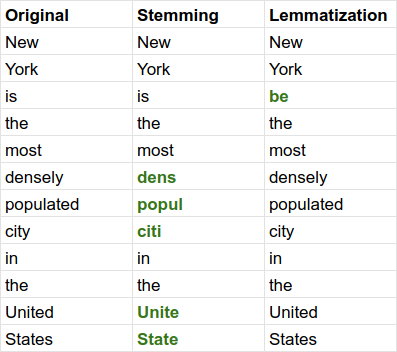

In [43]:
wordNetLemmatizer = WordNetLemmatizer()
lemmaWords1 = [wordNetLemmatizer.lemmatize(word) for word in tokens1]

print(f'Tokens after Lemmatization using WordNet Lemmatizer: \n{tokens1} => {lemmaWords1}')

Tokens after Lemmatization using WordNet Lemmatizer: 
['OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'on', 'that', 'OVO', 'stage'] => ['OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'on', 'that', 'OVO', 'stage']


In [44]:
lemmaWords2 = [word.lemma_ for word in tokens2]

print(f'Tokens after Lemmatization using SpaCy Lemmatization: \n{tokens2} => {lemmaWords2}')

Tokens after Lemmatization using SpaCy Lemmatization: 
[Our, Deeds, are, the, Reason, of, this, #, earthquake, May, ALLAH, Forgive, us, all] => ['our', 'deed', 'be', 'the', 'Reason', 'of', 'this', '#', 'earthquake', 'may', 'ALLAH', 'forgive', 'we', 'all']


# **FEATURE ENGINEERING**

# **Encoding**

Encoding is the process of encrypting data in a format that computers can understand. Humans comprehend natural language. However, a machine is capable of decoding only 0s and 1s. Encoding converts text to digits. For example, the words 'positive' and 'negative' are mapped to the numbers '0' and '1'.

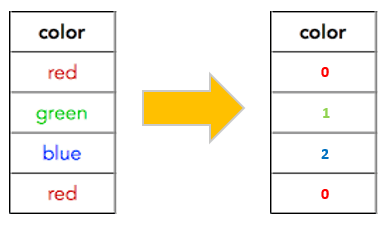

In [48]:
# animals = ['dog', 'cat', 'mouse', 'dog', 'lion', 'lion', 'mouse', 'tiger', 'rat', 'dog']

# label_encoder = preprocessing.LabelEncoder()
# encoded_values = # lable encode results
# data = pd.DataFrame({'Labels' : animals, 'Label Encoder Values' : encoded_values})

# print("Label Encoder")
# data.style.background_gradient(cmap = 'BrBG')

In [49]:
# animals = np.array(['dog', 'cat', 'mouse', 'dog', 'lion', 'lion', 'mouse', 'tiger', 'rat', 'dog'])

# ohe = preprocessing.OneHotEncoder()
# result = # one hot encoder results 

# data = pd.DataFrame(result.astype(int))
# data['Labels'] = animals

# print("One Hot Encoder")
# data.style.background_gradient(cmap = 'Wistia')

# **POS Tagger**

POS tagger is parts of speech tagger that is an in-built function found in a standard library. It tags the words in the sentences according to the grammar of the langauge. For example, in the text, “The pizza was disgusting but the location was beautiful”, the result after implementing POS tagger will be [“The [DT]”, “pizza [NN]”, “is [VB]”, “disgusting [VBG]”, “but [CC]”, “the [DT]”, “location [NN]”, “was [VBD], “beautiful [JJ]].

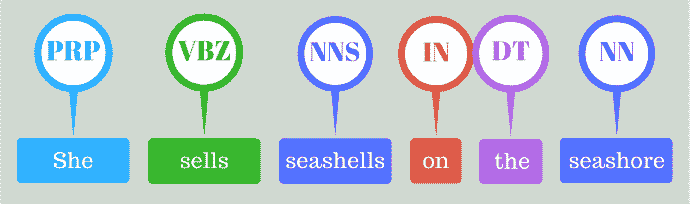

In [50]:
tagged_tokens1 = nltk.pos_tag(tokens1)

print(f'POS tagging using NLTK: \n{tokens1} => {tagged_tokens1}')

POS tagging using NLTK: 
['OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'on', 'that', 'OVO', 'stage'] => [('OVOFest', 'NNP'), ('Drake', 'NNP'), ('straight', 'VBD'), ('body', 'NN'), ('bagging', 'VBG'), ('Meek', 'NNP'), ('on', 'IN'), ('that', 'DT'), ('OVO', 'NNP'), ('stage', 'NN')]


In [51]:
tagged_tokens2 = [word.pos_ for word in tokens2]

print('POS tagging using SpaCy: \n')
for i in range(len(tagged_tokens2)):
    print(f'{tokens2[i]} : {tagged_tokens2[i]}')

POS tagging using SpaCy: 

Our : PRON
Deeds : NOUN
are : AUX
the : DET
Reason : PROPN
of : ADP
this : DET
# : ADJ
earthquake : NOUN
May : AUX
ALLAH : PROPN
Forgive : VERB
us : PRON
all : DET


# **N-Gram**

N-gram is a language model widely used in NLP and is applied to statistical problems involving text and audio. It is a probabilistic model that predicts the next series of words. For example, in the sentence, “The movie was boring.” Unigram processes the text as [“The”, “movie”, “was”, “boring”]. Bi-gram processes the text as [“The movie”, “movie was”, “was boring”]. Tri-gram processes the text as [“The movie was”, “movie was boring”]

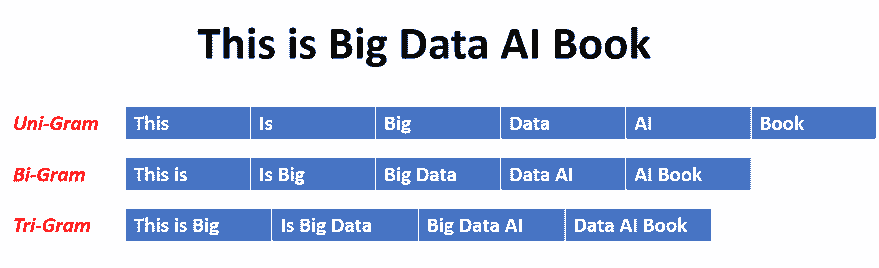

In [52]:
n_grams1 = ngrams(tokens1, 2)
n_grams1 = [ ' '.join(grams) for grams in n_grams1]

print(f'N-Gram using NLTK (n = 2): \n{tokens1} => {n_grams1}')

N-Gram using NLTK (n = 2): 
['OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'on', 'that', 'OVO', 'stage'] => ['OVOFest Drake', 'Drake straight', 'straight body', 'body bagging', 'bagging Meek', 'Meek on', 'on that', 'that OVO', 'OVO stage']


In [53]:
n_gram_finder = nltk.collocations.TrigramCollocationFinder.from_words(tokens1)

print(f'Most Common N-Gram Finder using NLTK (n = 3): \n{tokens1} => {n_gram_finder.ngram_fd.most_common(2)}')

Most Common N-Gram Finder using NLTK (n = 3): 
['OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'on', 'that', 'OVO', 'stage'] => [(('OVOFest', 'Drake', 'straight'), 1), (('Drake', 'straight', 'body'), 1)]


# **Bag of Words**

The bag of words carries out sentence tokenization and word tokenization. After that, it counts the number of appearances of each word. For example, in a sentence, “It is nice but horrid, and that’s not a nice thing.” The word “nice” is extracted and countered with two occurrences.

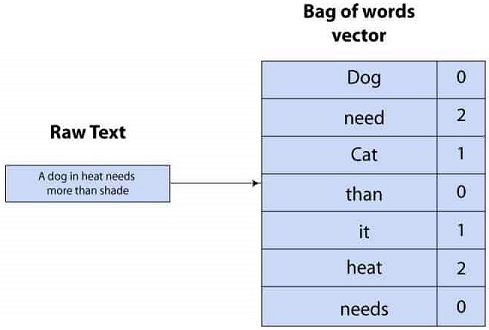

In [54]:
word_count = {}

for word in tokens1:
    
    if word not in word_count.keys():
        word_count[word] = 1
    else:
        word_count[word] += 1
        
print(f'Bag of Words: \n{tokens1} => {word_count}')

Bag of Words: 
['OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'on', 'that', 'OVO', 'stage'] => {'OVOFest': 1, 'Drake': 1, 'straight': 1, 'body': 1, 'bagging': 1, 'Meek': 1, 'on': 1, 'that': 1, 'OVO': 1, 'stage': 1}


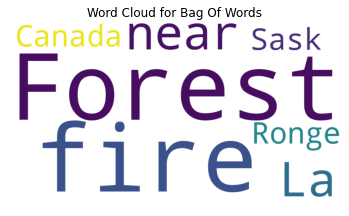

In [55]:
stopwords = set(STOPWORDS)

wc = WordCloud(width = 900, height = 500, background_color = 'white', random_state = 10).generate(text[1])

plt.title('Word Cloud for Bag Of Words')
plt.imshow(wc)
plt.axis('off')
plt.show()

# **Term Frequency**

TF – Term Frequency is described as the number of times that a term occurs in a document. It considers all the terms of equal importance. For example, the word “Fruit” appears five times in a document of 100 words, then the TF for “Fruit” is 5/100 = 0.05.

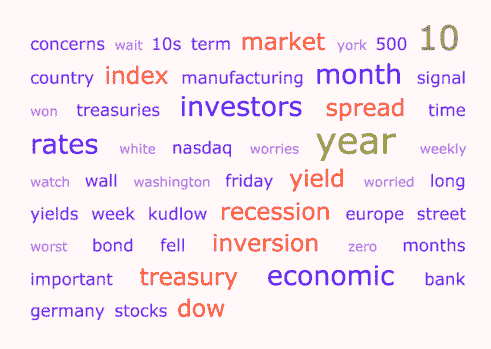

In [56]:
def color(val):
    
    color = 'mediumaquamarine' if val > 0 else ''
    return 'background-color: %s' % color

In [57]:
count_vectorizer = CountVectorizer()
text_list = list(text[0:10])

tf = count_vectorizer.fit_transform(text_list)

tf_feature_names = count_vectorizer.get_feature_names()

print('Term Frequency of Document')
df = pd.DataFrame(tf.toarray(), columns = tf_feature_names) / len(tf_feature_names)
df.style.set_caption("Term Frequency of Document")
df.style.applymap(color)

Term Frequency of Document


,000,13,20,across,afraid,alaska,all,allah,an,and,are,area,areas,as,asked,being,both,building,by,cafire,california,can,canada,causes,closed,colorado,coming,county,deeds,directions,disaster,due,earthquake,emergency,evacuation,expected,fire,flash,flood,flooding,forest,forgive,from,got,happening,heavy,hill,hwy,in,into,is,just,la,lake,manitou,may,near,no,notified,now,of,officers,on,or,orders,other,our,people,photo,place,pours,rain,reason,receive,residents,rockyfire,ronge,ruby,sask,school,see,sent,shelter,smoke,springs,street,streets,that,the,there,this,to,top,tornado,update,us,wildfires,woods
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.010204,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,0.010204,0.010204,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.010204,0.000000,0.000000,0.010204,0.000000,0.010204,0.010204,0.010204,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.010204,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

# **Term Frequency - Inverse Document Frequency**

TF-IDF – Term Frequency-Inverse Document Frequency is described as the importance of a word in a document, which is proportional to the number of times the word appears in the document. For example, the word “Fruit” appears in 100 of 10000 documents and the term frequency is 5 then the TF-IDF is 0.05 * log(10000/100) = 5 * 2 = 10.

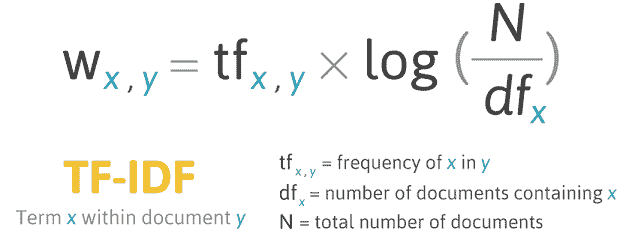

In [58]:
tfidf_vectorizer = TfidfVectorizer()
text_list = list(text[0:10])

tfidf = tfidf_vectorizer.fit_transform(text_list)

tfidf_feature_names = tfidf_vectorizer.get_feature_names()

print('Term Frequency - Inverse Document Frequency of Document')
df = pd.DataFrame(tfidf.toarray(), columns = tfidf_feature_names)
df.style.set_caption("Term Frequency - Inverse Document Frequency of Document")
df.style.applymap(color)

Term Frequency - Inverse Document Frequency of Document


,000,13,20,across,afraid,alaska,all,allah,an,and,are,area,areas,as,asked,being,both,building,by,cafire,california,can,canada,causes,closed,colorado,coming,county,deeds,directions,disaster,due,earthquake,emergency,evacuation,expected,fire,flash,flood,flooding,forest,forgive,from,got,happening,heavy,hill,hwy,in,into,is,just,la,lake,manitou,may,near,no,notified,now,of,officers,on,or,orders,other,our,people,photo,place,pours,rain,reason,receive,residents,rockyfire,ronge,ruby,sask,school,see,sent,shelter,smoke,springs,street,streets,that,the,there,this,to,top,tornado,update,us,wildfires,woods
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.257710,0.303156,0.000000,0.000000,0.257710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.303156,0.000000,0.000000,0.000000,0.303156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.303156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.303156,0.000000,0.000000,0.000000,0.000000,0.225466,0.000000,0.000000,0.000000,0.000000,0.000000,0.257710,0.000000,0.000000,0.000000,0.000000,0.000000,0.303156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200455,0.000000,0.257710,0.000000,0.000000,0.000000,0.000000,0.303156,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.290530,0.000000,0.000000,0.000000,0.390639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390639,0.000000,0.000000,0.000000,0.390639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390639,0.000000,0.390639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.171413,0.000000,0.000000,0.000000,0.342825,0.000000,0.000000,0.000000,0.201640,0.201640,0.000000,0.000000,0.201640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.149966,0.201640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.216492,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.201640,0.201640,0.000000,0.000000,0.201640,0.000000,0.201640,0.171413,0.201640,0.000000,0.000000,0.000000,0.403280,0.000000,0.000000,0.000000,0.000000,0.201640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.403280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.149966,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.382366,0.382366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.325046,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.284377,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.205265,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.325046,0.000000,0.000000,0.382366,0.000000,0.000000,0.000000,0.000000,0.000000,0.382366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

# **Dependency Parser**

Stanford dependency parser establishes the relationship between entities in the language using grammatical rules. The output of the parser is a tree structure that is annotated. For example, in the sentence “The funny boy joked,” “funny” is an adjective for the noun “boy.”

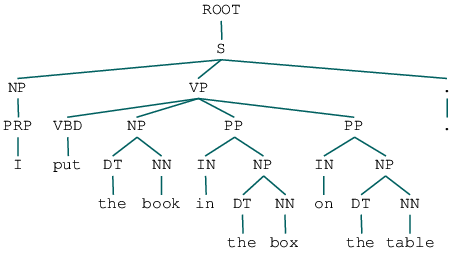

In [59]:
grammar = "NP: {<DT>?<JJ>*<NN>}"

parser = nltk.RegexpParser(grammar)
parse_tree = parser.parse(tagged_tokens1)

print(f'Dependency Parse Tree using NLTK: \n\n{sents1[0]} => \n\n{parse_tree}')

Dependency Parse Tree using NLTK: 

#OVOFest Drake straight body bagging Meek on that OVO stage. => 

(S
  OVOFest/NNP
  Drake/NNP
  straight/VBD
  (NP body/NN)
  bagging/VBG
  Meek/NNP
  on/IN
  that/DT
  OVO/NNP
  (NP stage/NN))


In [60]:
print('Dependency Parse Tree using SpaCy')

displacy.render(sp(text[1000]), style = "dep", jupyter = True, options = {"distance" : 100})

Dependency Parse Tree using SpaCy


# **Named Entity Recognition**

NER - Named Entity Recognition is the process of extracting proper nouns or proper noun phrases. For example, in the sentence 'Robert is interested in Amazon', the entities 'Robert' (Name) and 'Amazon' (Organization) are selected.

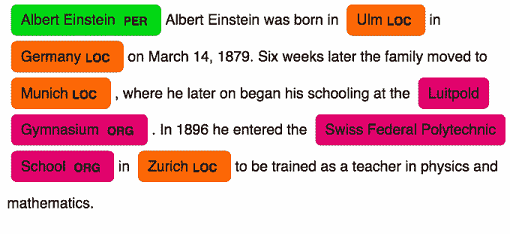

In [61]:
ner_chunk = nltk.ne_chunk(tagged_tokens1)

print(f'Named Entity Recognition using NLTK: \n\n{sents1[0]} =>\n')

for x in str(ner_chunk).split('\n'):
    if '/NN' in x:
        print(x)

Named Entity Recognition using NLTK: 

#OVOFest Drake straight body bagging Meek on that OVO stage. =>

  (ORGANIZATION OVOFest/NNP)
  (PERSON Drake/NNP)
  body/NN
  (PERSON Meek/NNP)
  OVO/NNP
  stage/NN)


In [62]:
ner_sent = sp(text[1])

print(f'Named Entity Recognition using SpaCy: \n\n{ner_sent} =>\n')

for ent in ner_sent.ents:
    print(ent.text, '-', ent.label_)

Named Entity Recognition using SpaCy: 

Forest fire near La Ronge Sask. Canada =>

La Ronge Sask - FAC
Canada - GPE


In [63]:
print('Named Entity Recognition Visualization using SpaCy')
displacy.render(ner_sent, style = 'ent', jupyter = True)

Named Entity Recognition Visualization using SpaCy


# **Word Embedding**

Word embedding is the process of converting text into numerical data. Since computers work on only numbers and cannot accurately compute data in the form of strings, words are embedded into a unique integer or numerical code. For example, the word “Severe” is fixed as a number “3214”.

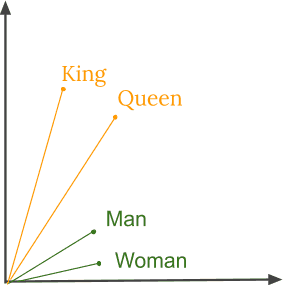

In [64]:
warnings.filterwarnings('ignore')

word2vec = gensim.models.Word2Vec(abc.sents())
embedding1 = word2vec.most_similar(tokens1[-1])
vector1 = word2vec[tokens1[-1]]

print(f'Word Embeddibng using Word2Vec: \n\nMost Similar Words => {embedding1} \n\nWord Vector => {vector1}')

Word Embeddibng using Word2Vec: 

Most Similar Words => [('point', 0.9253852367401123), ('morning', 0.8916757106781006), ('afternoon', 0.8859384655952454), ('season', 0.864721417427063), ('view', 0.8618740439414978), ('situation', 0.8606002330780029), ('case', 0.8557428121566772), ('position', 0.8544349074363708), ('hand', 0.8535138964653015), ('condition', 0.8419406414031982)] 

Word Vector => [-0.15992324  0.2269509   0.02116478  0.04671565  0.07047275  0.07843367
  0.1370648  -0.16652547  0.09308234  0.04988313  0.21076618  0.16352354
 -0.04171849  0.27835748  0.794504    0.35224235 -0.03378622 -0.33774525
 -0.10355129  0.1888019  -0.0775739  -0.41863835 -0.21960846  0.42520556
 -0.00871623  0.19753955 -0.17731334 -0.10548306 -0.47757137 -0.12232168
  0.21281613  0.14558215 -0.2297971  -0.5474228   0.48312977 -0.6482212
 -0.2085315   0.35971     0.22896737 -0.14713731  0.30501908  0.15283051
 -0.08387273  0.46303913  0.38400957  0.11727034 -0.50384116 -0.69803554
  1.2710888   0.161

<div class="alert alert-info" style = 'color:black'>
  🤩 Visualizing Word Embedding with Word2Vec using PCA! </div>

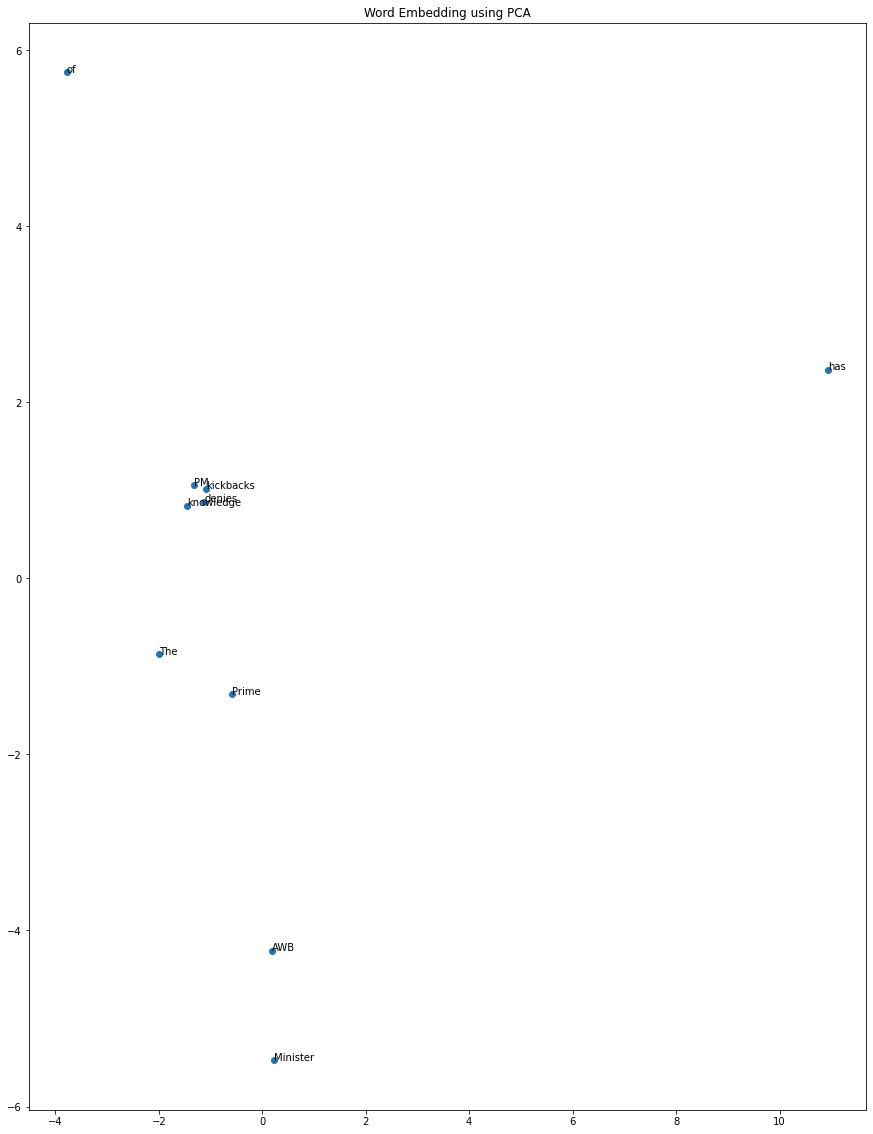

In [65]:
pca = PCA(n_components = 2)

X = word2vec[word2vec.wv.vocab]
X = X[ : 10, : ]

result = pca.fit_transform(X)
words = list(word2vec.wv.vocab)
words = words[ : 10]

plt.figure(figsize = (15, 20))
plt.title('Word Embedding using PCA')
plt.scatter(result[ : , 0], result[ : , 1])
for i, word in enumerate(words):
    plt.annotate(word, xy = (result[i, 0], result[i, 1]))
plt.show()

<div class = "alert alert-info" style = 'color:black'> 🔦 For Word Embedding using GloVe, the embedding representation 'glove.6B.100d.txt' is used! </div>

In [66]:
input_file = '../input/glove6b/glove.6B.100d.txt'
output_file = '../glove.6B.100d.txt.word2vec'

glove2word2vec(input_file, output_file)

model = KeyedVectors.load_word2vec_format(output_file, binary = False)
result = model.most_similar(positive = ['king', 'woman'], negative = ['man'], topn = 1)

print(f'Word Embedding using GloVe: \n{result}')

Word Embedding using GloVe: 
[('queen', 0.7698541283607483)]


# **Sentiment Analysis**

Sentimental analysis plays a significant role in determining the polarity of a review or a comment. It is used to know whether the person is talking about something in a positive way or a negative way. It can be classified broadly into positive, negative, and neutral. For example, on a tourism website, a person leaves a remark stating, “There are beautiful tourist spots in Switzerland. “The word ‘beautiful’ is positive as it describes Switzerland as pretty.

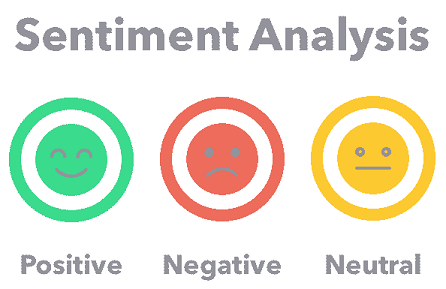

In [67]:
sia = SentimentIntensityAnalyzer()
polarity_scores1 = sia.polarity_scores(text[10])

print(f"Sentiment Analysis using NLTK: \n{text[10]} => {polarity_scores1}")

Sentiment Analysis using NLTK: 
Three people died from the heat wave so far => {'neg': 0.31, 'neu': 0.69, 'pos': 0.0, 'compound': -0.5574}


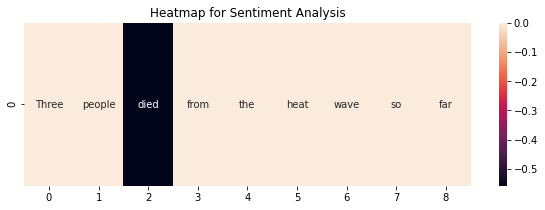

In [68]:
x = np.array([[sia.polarity_scores(word)['compound'] for word in word_tokenize(text[10])]])
annot = np.array([word_tokenize(text[10])])

plt.figure(figsize = (10, 3))
sns.heatmap(x, annot = annot, fmt = '')
plt.title('Heatmap for Sentiment Analysis')
plt.show()

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
import os

from wordcloud import WordCloud


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score

from bs4 import BeautifulSoup
!pip install -q contractions
import contractions
from textblob import TextBlob
import spacy

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [110]:
train = pd.read_csv("../input/nlp-getting-started/train.csv")
y=train.target.values

# read test csv file as test 

In [134]:
# Functions for clean data

from spacy.lang.en.stop_words import STOP_WORDS as stopwords
global stopwords

def get_words_counts(tweets):
        length = len(str(tweets).split())
        return length
    
def get_chars_counts(tweets):
        string = tweets.split()
        x = ''.join(string)
        return len(x)
    
def get_average_word_length(tweets):
        count = get_chars_counts(tweets)/get_words_counts(tweets)
        return count
    
def get_stopwords_count(tweets):
        global stopwords
        stopwords = len([t for t in tweets.split() if t in stopwords])
        return stopwords
    
def get_hashtags_tags(tweets):
        hashtags = len([t for t in tweets.split() if t.startswith('#')])
        return hashtags
        
def get_email_tags(tweets):
        email = len([t for t in tweets.split() if t.startwith('@')])
        return email
    
def get_digit_counts(tweets):
        digits = re.findall(r'[0-9,.]+', tweets)
        return digits
    
def get_uppercase_units(tweets):
        uppercase = len([t for t in tweets.split() if t.isupper()])
        return uppercase

In [135]:
# With this function we can get some features for build a bit EDA

def get_features(df):
    if type(df) == pd.core.frame.DataFrame:
        df['words_counts'] = df['text'].apply(lambda x: get_words_counts(x))
        df['char_counts'] = df['text'].apply(lambda x: get_chars_counts(x))
        df['average_word_length'] = df['text'].apply(lambda x: get_average_word_length(x))
#        df['stopwords_counts'] = df['text'].apply(lambda x: get_stopwords_count(x))
        df['hashtags_counts'] = df['text'].apply(lambda x: get_hashtags_tags(x))
#        df['email_counts'] = df['text'].apply(lambda x: get_email_tags(x))
        df['digits_counts'] = df['text'].apply(lambda x: get_digit_counts(x))
        df['uppercase_counts'] = df['text'].apply(lambda x: get_uppercase_units(x))
        
    else:
        print('ERROR')
        
    return df

In [136]:
train = get_features(train)

In [137]:
def remove_tweet_username(df):
    return re.sub('@[^\s]+','', df)

def make_lower(df):
    return df.lower()

def cont_exp(df):
    return contractions.fix(df)

def make_string(df):
    return str(df)

def remove_url(df):
    return re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , df)

def remove_email(df):
    return re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", df)

#Retweets
def remove_rt(df):
    df = str(df)
    return re.sub(r'\brt\b', "", df).strip()

def remove_html(df):
    return BeautifulSoup(df, 'lxml').get_text().strip()


def remove_dots(df):
    dot_pattern = re.compile(r'\.{1,}')
    single_dot = dot_pattern.sub(' ', df)
    return single_dot

def remove_special_chars(df):
    df = re.sub(r'[^\w]+', " ", df)
    df = ' '.join(df.split())
    
    return df

def make_base(df):
    df = str(df)
    x_list = []
    doc = nlp(df)

    for token in doc:
        lemma = token.lemma_
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text

        x_list.append(lemma)
    return ' '.join(x_list)

def spelling_correction(df):
    df = TextBlob(df).correct()
    return df

def resub(df):
    return re.sub("(.)\\1{2,}", "\\1", df)



def get_clean_data(df):
    df = remove_url(df)
    df = remove_email(df)
#    df = remove_special_chars(df)
    df = remove_html(df)
#    df = remove_dots(df)
#    df = make_base(df)
#    df = spelling_correction(df).raw_sentences[0]
    df = make_lower(df)
    df = make_string(df)
    df = cont_exp(df)
    df = remove_rt(df)
    df = resub(df)                             
    df = remove_tweet_username(df)
    
    return df

In [140]:
train['text'] = train['text'].apply(get_clean_data)
test['text'] = test['text'].apply(get_clean_data)

In [141]:
train['text'] = train['text'].apply(remove_special_chars)
test['text'] = test['text'].apply(remove_special_chars)

In [142]:
from gensim.parsing.preprocessing import STOPWORDS

In [143]:
STOPWORDS.difference()

all_stopwords_gensim = STOPWORDS
sw_list = {"not"}
all_stopwords_gensim = STOPWORDS.difference(sw_list)

# Use Gensim

from gensim.parsing.preprocessing import remove_stopwords

train['text'] = train['text'].apply(remove_stopwords)
test['text'] = test['text'].apply(remove_stopwords)

In [144]:
# trying to remove all digits from a columns

train['text'] = train['text'].str.replace('\d+', '')
test['text'] = test['text'].str.replace('\d+', '')

In [145]:
text = train['text']
y = train['target']

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(text)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 7, stratify=y)

In [150]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()

def run_LR(clf_lr, X_train, X_test, y_train, y_test):
    
    clf_lr.fit(X_train, y_train)
    y_pred = clf_lr.predict(X_test)
    
    print()
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print(f"f1_score: {f1_score(y_test, y_pred)}")
    
run_LR(clf_lr, X_train, X_test, y_train, y_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83      1086
           1       0.85      0.61      0.71       818

    accuracy                           0.79      1904
   macro avg       0.81      0.77      0.77      1904
weighted avg       0.80      0.79      0.78      1904

f1_score: 0.7149964463397299


In [155]:
import en_core_web_lg
nlp = en_core_web_lg.load()

def get_vec(x):
    doc = nlp(x)
    vec = doc.vector
    return vec

In [156]:
train['vectors'] = train['text'].apply(lambda x: get_vec(x))
X = train['vectors'].to_numpy()
X = X.reshape(-1, 1)

In [157]:
### Normalization

from sklearn.preprocessing import normalize
X = np.concatenate(np.concatenate(X, axis = 0), axis = 0).reshape(-1, 300)
X = normalize(X)
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 7, stratify=y)

In [158]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()

def run_LR(clf_lr, X_train, X_test, y_train, y_test):
    
    clf_lr.fit(X_train, y_train)
    y_pred = clf_lr.predict(X_test)
    
    print()
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print(f"f1_score: {f1_score(y_test, y_pred)}")
    
run_LR(clf_lr, X_train, X_test, y_train, y_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1086
           1       0.80      0.72      0.76       818

    accuracy                           0.81      1904
   macro avg       0.81      0.80      0.80      1904
weighted avg       0.81      0.81      0.80      1904

f1_score: 0.7622107969151671
